https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
교통 표지판 분류

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sns

In [25]:
file_list = os.listdir('C:/Users/s_wnsgk4041/data/1/')
file_list
directory = 'C:/Users/s_wnsgk4041/data/1/'
directory

'C:/Users/s_wnsgk4041/data/1/'

In [26]:
directory + 'Meta.csv'

'C:/Users/s_wnsgk4041/data/1/Meta.csv'

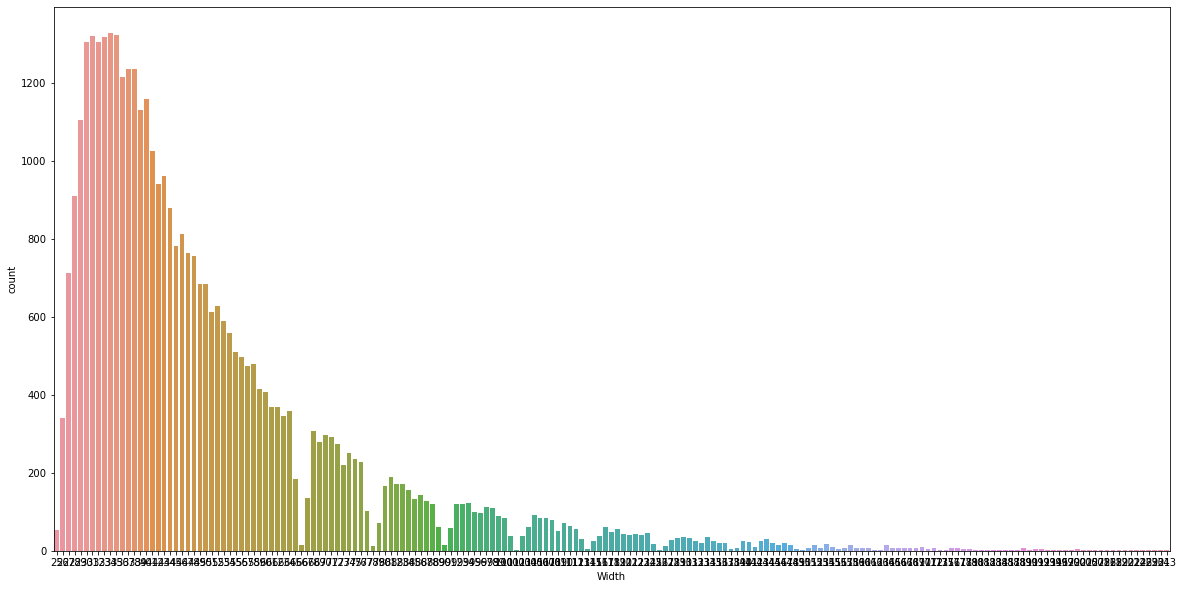

In [27]:
df_Meta = pd.read_csv(directory + 'Meta.csv')

df_Train = pd.read_csv(directory + 'Train.csv')
df_Test = pd.read_csv(directory + 'Test.csv')

plt.figure(figsize=(20,10))
ax = sns.countplot(x="Width", data=df_Train) # png 파일 크기 

In [28]:
df_Train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [30]:
image_height = 34
image_width = 34
image_channel = 3

Train_images = []
Train_labels = []

for i in range(len(df_Train)):
    img = load_img(directory + df_Train['Path'][i], target_size = (image_height, image_width))
    img = img_to_array(img)
    Train_labels.append(df_Train['ClassId'][i])
    Train_images.append(img)

In [31]:
Test_images = []
Test_labels = []

for i in range(len(df_Test)):
    img = load_img(directory + df_Test['Path'][i], target_size = (image_height, image_width))
    img = img_to_array(img)
    Test_labels.append(df_Test['ClassId'][i])
    Test_images.append(img)

In [36]:
x_train, x_val, y_train, y_val = train_test_split(np.array(Train_images), np.array(Train_labels), test_size=0.4)
x_test = np.array(Test_images)
y_test = np.array(Test_labels)

x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


In [1]:
model = Sequential([    
    Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(image_height, image_width, image_channel)),
    Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides = (2,2)),
    Dropout(rate=0.3),
    
    Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3,3), padding = 'same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides = (2,2)),
    Dropout(rate=0.5),
    
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.4),
    Dense(512, activation='relu'),
    Dropout(rate=0.4),
    Dense(43, activation='softmax')
])

model.summary()

NameError: name 'Sequential' is not defined

In [38]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [39]:
EPOCHS = 20

history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_val, y_val), # validation 데이터 사용
                    epochs=EPOCHS, 
                   )

Epoch 1/20
736/736 [==============================] - 36s 40ms/step - loss: 2.4771 - accuracy: 0.4049 - val_loss: 0.4094 - val_accuracy: 0.8800
Epoch 2/20
736/736 [==============================] - 29s 39ms/step - loss: 0.1890 - accuracy: 0.9410 - val_loss: 0.1353 - val_accuracy: 0.9628
Epoch 3/20
736/736 [==============================] - 28s 38ms/step - loss: 0.1020 - accuracy: 0.9670 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 4/20
736/736 [==============================] - 28s 38ms/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.0432 - val_accuracy: 0.9869
Epoch 5/20
736/736 [==============================] - 28s 38ms/step - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0682 - val_accuracy: 0.9816
Epoch 6/20
736/736 [==============================] - 29s 39ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 7/20
736/736 [==============================] - 29s 39ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0477 - val_accuracy:

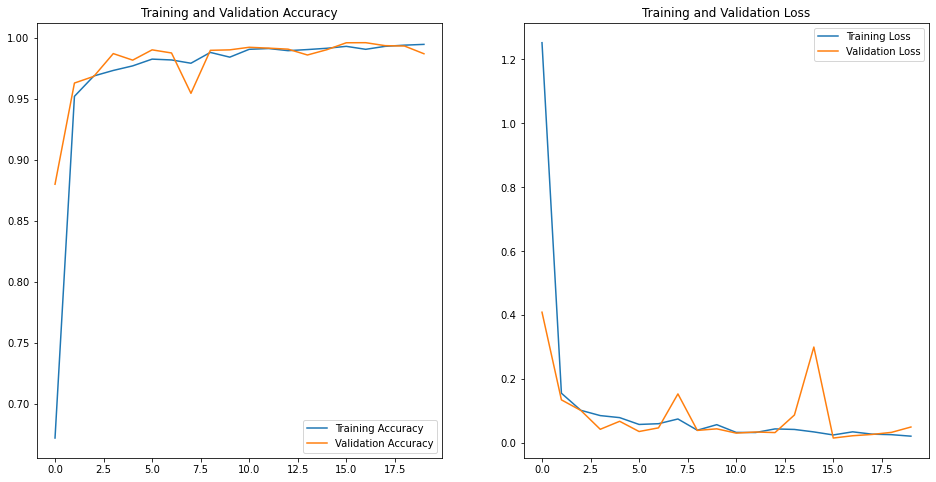

In [42]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print('test set accuracy: ', test_accuracy)

test set accuracy:  0.9601742029190063
